https://www.justintodata.com/data-cleaning-techniques-python-guide/
In reality, the raw data is almost always messy. If you use such data for analysis, for example, feed into a machine learning model, you’ll get useless insights most of the time. That’s why data cleansing is a critical process for data analysts and data scientists.

In [7]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

df = sns.load_dataset('iris')

# Get information on the dataset

Getting the type and number of non-null values from the entire dataset

In [6]:
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Getting 2 lists that contains the name of the columns depending on the type of data
- numerical
- non numerical

In [5]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['species'], dtype='object')


# Missing Data

## Method #1: missing data (by columns) count & percentage

Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

In [8]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


We can print out the first 10 columns to look at.

In [9]:
num_missing = df.isna().sum()
num_missing[:10]

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Besides the count of missing values, we can use the below code to calculate the percentages of missing values by columns

In [11]:
pct_missing = df.isna().mean()
pct_missing[:10]

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

## Method #2: missing data (by columns) heatmap

<AxesSubplot:>

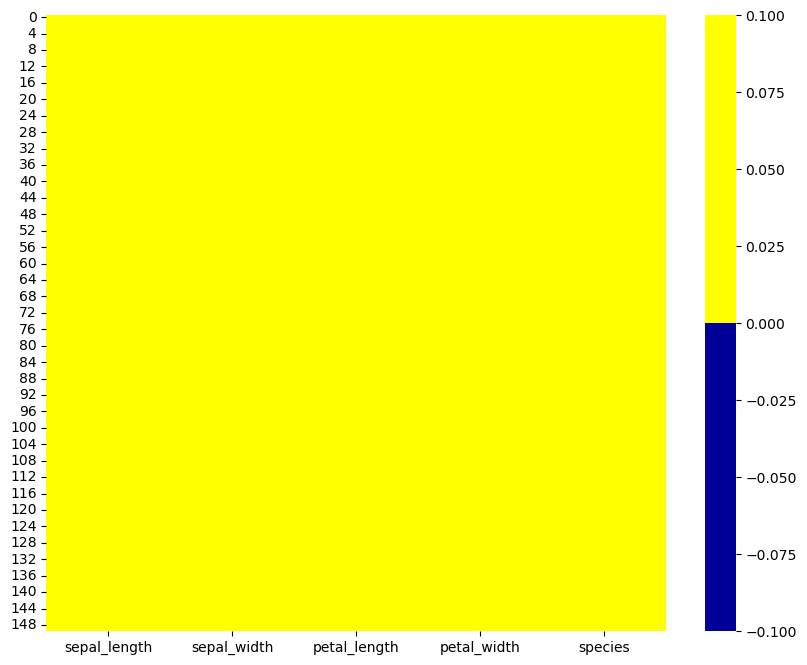

In [12]:
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

The missingno library is a small toolset focused on missing data visualizations and utilities. So you can get the same missing data heatmap as above with shorter code.

In [13]:
msno.matrix(df.iloc[:, :30])

ModuleNotFoundError: No module named 'missingno'

## Method #3: missing data (by rows) histogram

<AxesSubplot:>

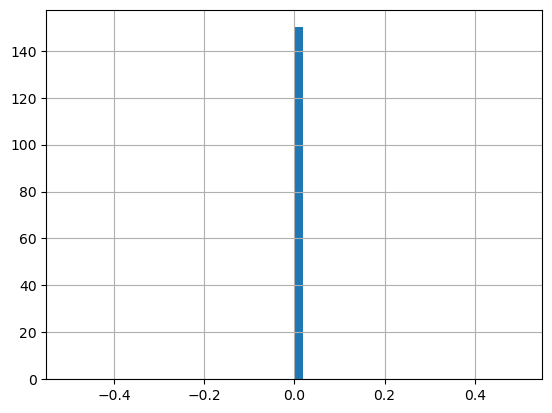

In [14]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)